# Feature engineering

In this notebook we cover examples of common feature engineering tasks on both numeric and categorical data. The goal isn't to be exhaustive, but provide you with enough examples that you get the picture. As we will see in future lectures, good feature engineering can significantly improve model performance, but feature engineering, just like machine learning in general, can be "part art, part science". So let's see what we mean by that.

We begin with numeric features. Let's begin by reading some data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
LocalFile = '../data/auto-mpg.csv'
UCI_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
url = UCI_url
auto = pd.read_csv(url, sep = '\s+', header = None, 
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                            'acceleration', 'model year', 'origin', 'car_name'])

auto['cylinders'] = auto['cylinders'].astype('category')
auto.describe()

,mpg,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,455.000000,5140.000000,24.800000,82.000000,3.000000


We saw some examples of **feature transformation** functions in the previous lesson. **Feature engineering**, in fact, consists of running similar feature transformations on the data and gradually modifying existing columns and adding new features to the data, with the goal of ending up with features that are more useful to the model than the original features we started with. What makes feature engineering so special is that we apply these transformations with an eye towards making the machine learning steps easier or more doable. Having good features (what feature engineering is all about) can significantly impact how well we do when we move on to machine learning.

A common type of feature transformation for numeric features is **feature normalization**. Note that **normalization** is a word that means something very different in relational databases than in machine learning, so be careful not to confuse the two. 

The general formula for **linear normalization** is:
$$xNorm = \dfrac{x - offset}{scale}$$
- **offset** is the upward shift of the original variable before normalization
- **scale** is the spread or stretch of the original variable before normalization

The two most common ways to normalize features is **Z-normalization** and **min-max normalization**:

- **Z-normalization** consists of the following transformation, and results in most of the values for the transformed $x$ being between -2 and 2. 
$$x \rightarrow \dfrac{x - mean(x)}{std(x)}$$
- **min-max normalization** consists of the following transformation, and forces all the values of the transformed $x$ to be between 0 and 1: 
$$x \rightarrow \dfrac{x - min(x)}{max(x) - min(x)}$$  

So what is the purpose of normalization? If we only have one feature, normalization might not serve a purpose. Normalization makes sense when we have many features and we want to **put them on the same scale**, which is why normalization is also sometimes called **rescaling** or **standardization**. **Some (but not all) ML algorithms only work properly if the data is normalized, otherwise the features that have larger numbers or large scales will dominate the model.** So normalization acts as a way of leveling the playing field among variables.

### Exercise (15 minutes)

- Normalize `mpg`, `displacement`, `weight` and `acceleration`. Instead of overwriting the original columns, add the normalized features as new columns and name each column using the column name and a `_norm` suffix. You are free to choose between Z-normalization or min-max normalization.

In [3]:
#Add code here


Unless your Python skills are improving by leaps and bounds, you probably normalized the features one at a time. What if we wanted to do it all at once? 

- Write a loop to iterate over the four columns and normalize each. To make it easier, we already put the column names in a list for you.

In [4]:
num_cols = ['mpg', 'displacement', 'weight', 'acceleration']
# your code goes here


There is an even better way to run our transformations all at once without writing a loop. First we have to write a function whose input is an array and whose output is an array of the same size with the values normalized. 

- Write such a function and use the below cell to test it and make sure it worked.

In [5]:
def normalize(x):
    x_norm = x # Add code here:  modify here to write your function
    return x_norm

x_test = np.array([3, 5, 9, 11, 2, 0])
normalize(x_test)

array([ 3,  5,  9, 11,  2,  0])

- Apply the function to the data. HINT: use the `apply` method.
  - note that we need to limit the data to only the four columns we wish to transform
  - we need to use the `axis = 0` argument to let `apply` know that the transformation applies to columns (`axis = 1` would apply it to rows, which is not what we want here)

In [6]:
# Add code here


- Check the results using `describe`. Then do an additional sanity check:
  - if your function is doing Z-normalization, then check the mean and standard deviation of your normalized columns to make sure they are 0 and 1 respectively
  - if your function is doing min-max normalization, then check the minimum and maximum values of your normalized columns to make sure they are 0 and 1 respectively

In [7]:
# Add code here


In our implementation of the `normalize` function above, we computed the mean and standard deviation (or min and max in the case of min-max normalization) **on the fly**. This means that any time we want to normalize new data, we compute the mean and standard deviation of the new data and then normalize it accordingly. In machine learning, this poses a problem: normalizing two different data sets using the mean and standard deviation of each means that they each get normalized slightly differently and we lose the consistency (we will see why in future lectures). So instead, we want to learn the mean and standard deviation of one data, and normalize **that data and any future data** using the same mean and standard deviation.

Modify the `normalize` function so the mean and standard deviation are determined from one variable. Then apply the transformation to the other variable.  The test shows the following results:
- normalize `x_test_1` using the normalization parameters from `x_test_1` 
- normalize `x_test_2` using the normalization parameters from `x_test_1`
- normalize `x_test_2` using the normalization parameters from `x_test_2`

In [8]:
# Add code here

def normalize(x, by):
    x_norm = x # modify here to write your function
    return x_norm

x_test_1 = np.array([3, 5, 9, 11, 2, 0])
x_test_2 = np.array([1, 2, 5, 13, 9, -4])

print('Normalization of x_test_1:', normalize(x=x_test_1, by=x_test_1))
print('Normalization of x_test_2 by parameters from x_test_1:', normalize(x=x_test_2, by=x_test_1))
print('Normalization of x_test_2 by parameters from x_test_2:', normalize(x=x_test_2, by=x_test_2))

Normalization of x_test_1: [ 3  5  9 11  2  0]
Normalization of x_test_2 by parameters from x_test_1: [ 1  2  5 13  9 -4]
Normalization of x_test_2 by parameters from x_test_2: [ 1  2  5 13  9 -4]


This last part has important consequences in machine learning. As we will see next, this is something that is automatically handled by `sklearn`.

### End of exercise

Since normalization is a very common task, you shouldn't be surprised to find out that there are already functions for it. I hope you still found the previous exercise useful!

However, this time we have to go to the `sklearn` library to find our function. The `sklearn` library is Python's most common machine learning library and one that we will return to in future lectures. In addition to the machine learning algorithms we will learn about, `sklearn` also has functions for **pre-processing data**, which is a vague term that includes tasks such as missing-value imputation, feature engineering and so on. Let's see how we can use it to normalize our data.

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
num_cols_minmax = [c + '_minmax' for c in num_cols] # names of min-max-transformed columns

At first blush, the following code might look a little strange, but this pattern as we will see is very common to ML-related tasks in `sklearn`:
- initialize the process by choosing the function (with arguments we wish, if any)
- run `fit` first on the data to determine the parameters
- run `transform` to apply the parameters in the transformation

In [10]:
minmax_scaler = MinMaxScaler() # initialization / create an instance of the class
minmax_scaler.fit(auto[num_cols])
auto[num_cols_minmax] = minmax_scaler.transform(auto[num_cols])
auto[num_cols_minmax].head()

,mpg_minmax,displacement_minmax,weight_minmax,acceleration_minmax
0,0.239362,0.617571,0.536150,0.238095
1,0.159574,0.728682,0.589736,0.208333
2,0.239362,0.645995,0.516870,0.178571
3,0.186170,0.609819,0.516019,0.238095
4,0.212766,0.604651,0.520556,0.148810


In [11]:
print(minmax_scaler.data_min_)
print(minmax_scaler.data_max_)
print(1./minmax_scaler.scale_)

[   9.   68. 1613.    8.]
[  46.6  455.  5140.    24.8]
[  37.6  387.  3527.    16.8]


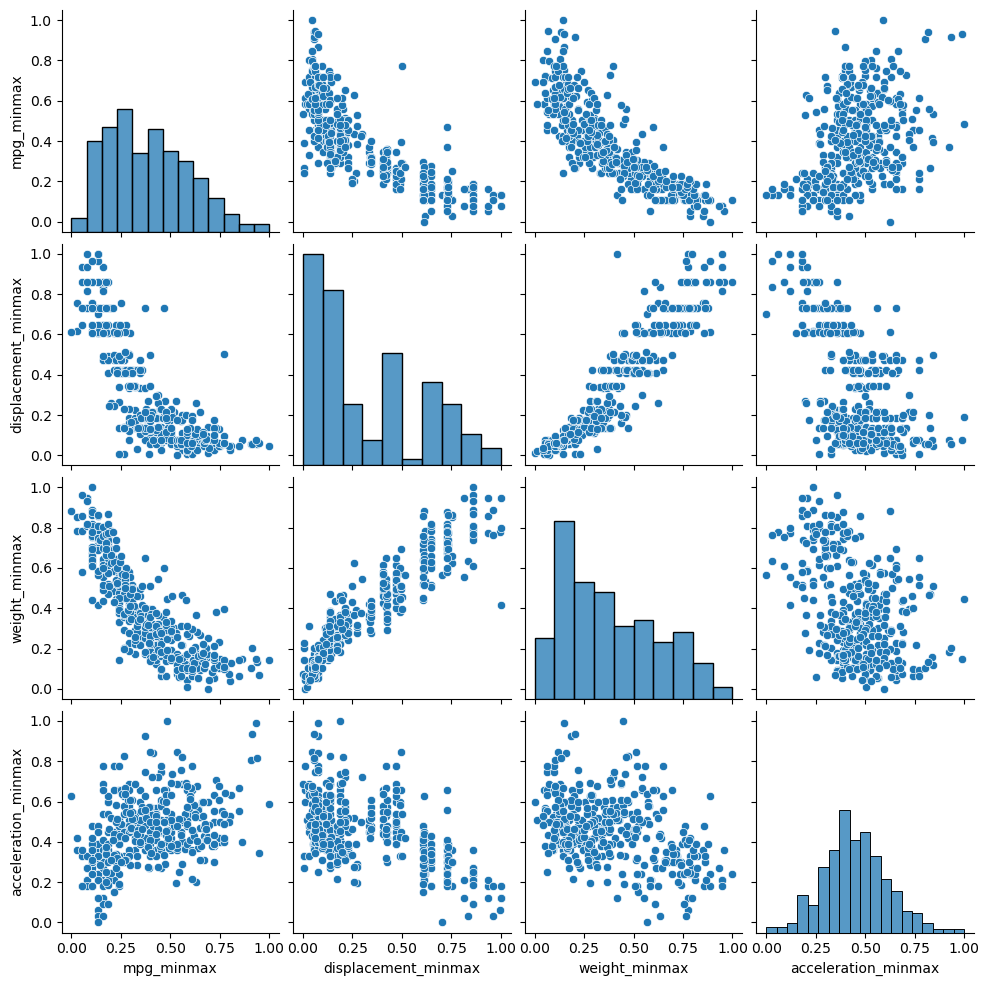

In [12]:
sns.pairplot(auto[num_cols_minmax]);

Here's the same example, but using Z-normalization.

In [13]:
num_cols_z = [c + '_z' for c in num_cols] # names of Z-transformed columns
znorm_scaler = StandardScaler()
znorm_scaler.fit(auto[num_cols])
auto[num_cols_z] = znorm_scaler.transform(auto[num_cols])
auto[num_cols_z].head()

,mpg_z,displacement_z,weight_z,acceleration_z
0,-0.706439,1.090604,0.630870,-1.295498
1,-1.090751,1.503514,0.854333,-1.477038
2,-0.706439,1.196232,0.550470,-1.658577
3,-0.962647,1.061796,0.546923,-1.295498
4,-0.834543,1.042591,0.565841,-1.840117


Let's look at the scatter plot matrix for the normalized features.

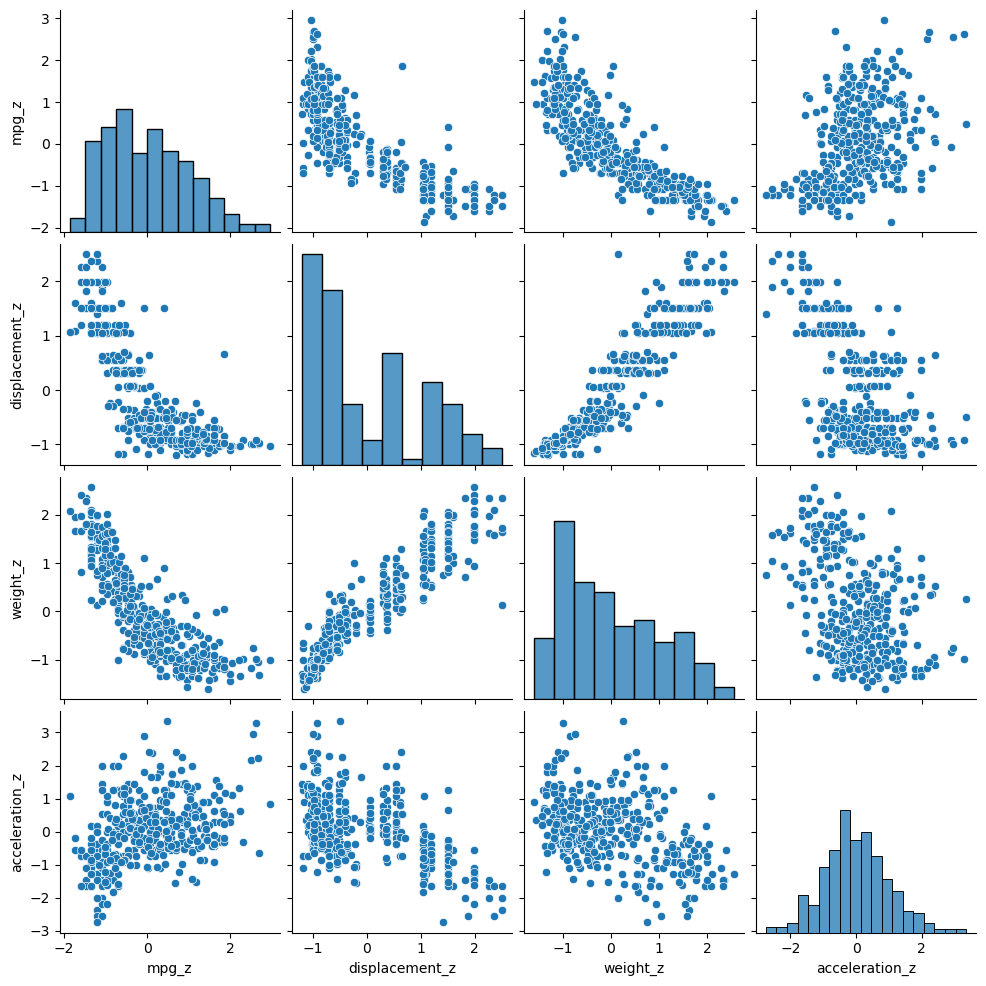

In [14]:
sns.pairplot(auto[num_cols_z]);

### Comment on Scatterplots and Histograms
In either case, it doesn't look like normalization changed anything to the scatter plot matrix. Do you notice what changed? The answer is that the **range of the data** is what changed. Just check the $x$ and $y$ axes and you'll see. Normalization is not really supposed to change the distribution of the data, just put all features on the same scale.

Let's look one last time at the code for normalizing the data using `sklearn`.
<br/><br/>
**<font size="5">
`minmax_scaler = MinMaxScaler()`<br/>
`minmax_scaler.fit(auto[num_cols])`<br/>
`auto[num_cols_minmax] = minmax_scaler.transform(auto[num_cols])`<br/>
`auto[num_cols_minmax].head()`
</font>**  
<br/>
You might be curious why we use `fit` followed by `transform`. What exactly happens when we run `fit`? Why should those two steps not be a single step? Here's a short answer using `MinMaxScaler` as our example:
  - When we run `fit` we find the min and max for the columns and remember it.
  - When we run `transform` we apply the transformation using the min and max we found when we ran `fit`.

This means that we can learn the min and max once, and then apply the **same** transformation (with the same min and max) not just to the original data, but any future data. In machine learning, this has important consequences, but that's the topic of a future lecture.

# Lesson 06 Assignment

In this assignment, we want to read the `retail-churn.csv` dataset that we examined in a previous assignment and begin to pre-process it. The goal of the assignment is to become familiar with some common pre-processing and feature engineering steps by implementing them.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

col_names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp', 'item_id', 'quantity', 'dollar']
churn = pd.read_csv("../data/retail-churn.csv", sep = ",", skiprows = 1, names = col_names)

### Some basic EDA
present the first few rows and use pandas' `describe` to get an overview of the data
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[0 point]</span>

In [16]:
# Add code here
churn.describe()

churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288


The new data frame will be called `churn_processed`, which stores the pre-processed columns as you run through each of these steps. You will need to make sure your columns are properly named.

1. Cast the `timestamp` column in churn into a column of type `datetime` and put the column into the `churn_processed` dataframe.  The new column should also be named `timestamp`.  Extract two new columns from `timestamp`: `dow` is the day of the week and `month` is the month of the year. Then drop the `timestamp` column from `churn_processed`.  Present the first few rows of `churn_processed`.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[2 point]</span>

In [17]:
# Add code here
# Create the new (empty) data frame, called churn_processed
churn_processed = pd.DataFrame()

# Cast timestamp to datetime
churn_processed['timestamp'] = pd.to_datetime(churn['timestamp'])
# Create a dow column
churn_processed['dow'] = churn_processed['timestamp'].dt.dayofweek  # Monday = 0, Sunday = 6
# Create a month column
churn_processed['month'] = churn_processed['timestamp'].dt.month
# Drop Timestamp
churn_processed = churn_processed.drop(columns = ['timestamp'])
# See what we have
churn_processed.head()

,dow,month
0,2,11
1,2,11
2,2,11
3,2,11
4,2,11


2. Add `address` from `churn` to `churn_processed`. One-hot encode `address`, `dow` and `month`. Then drop columns `address`, `dow`, and `month` from `churn_processed`.  Finally, show some of the dataframe.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[2 point]</span>  

In [18]:
# Add code here
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# add address column
churn_processed['address'] = churn['address']

# One-hot-encode address, dow and month
churn_cat = churn_processed[['address', 'dow', 'month']].copy()

# Create Column Names
onehot.fit(churn_cat)
col_names = onehot.get_feature_names_out(churn_cat.columns)

# Add one-hot encoded values to new columns
churn_processed_onehot =  pd.DataFrame(onehot.transform(churn_cat), columns = col_names)
churn_processed = pd.concat([churn_processed, churn_processed_onehot], axis=1)

# Drop address, dow and month
churn_processed = churn_processed.drop(columns = ['address', 'dow', 'month'])

# Show the dataframe
churn_processed.head()

,address_A,address_B,address_C,address_D,address_E,address_F,address_G,address_H,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,month_1,month_2,month_11,month_12
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


3. So far we dropped `address`, `dow`, `month`, and `timestamp`.  Why would we want to drop all these columns?
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[1 point]</span> 

**Why would we want to drop all these columns?**<br/>
Add Comment here  
The one hot encoded columns represented the same information of the categorical columns (address, dow, month and timestamp), so it is redundant to keep them. And the categorical columns are non-numeric, they do not work with ML libraries such as SK learn.


4. Rescale `dollar` using min-max normalization. Use `pandas` and `numpy` to do it and call the rescaled column `dollar_std_minmax`.  Then see what the first few rows of the dataframe looks like.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[1 point]</span> 

In [19]:
# Add code here
from sklearn.preprocessing import MinMaxScaler, StandardScaler

cols_minmax = ['dollar_std_minmax']

# create instance of class for minmax scaler
minmax_scaler = MinMaxScaler() 

minmax_scaler.fit(churn[['dollar']])  
churn_processed[cols_minmax] = minmax_scaler.transform(churn[['dollar']])

print(churn_processed[cols_minmax].head())

# See what the dataframe looks like
churn_processed.head()

   dollar_std_minmax
0           0.000510
1           0.000227
2           0.000312
3           0.000567
4           0.004066


,address_A,address_B,address_C,address_D,address_E,address_F,address_G,address_H,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,month_1,month_2,month_11,month_12,dollar_std_minmax
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000510
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000227
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000312
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000567
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.004066


You can read about **robust normalization** [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html). The word **robust** in statistics generally refers to methods that behave reasonably even if the data is unusual.  For example, you can say that the median is a *robust* measure for the "average" of the data, while the mean is not.  In this respect a normalization is similar to an average. For a normalization **robust** might mean that the method is not affected by outliers. 
<br/><br/>
5. Write briefly about what makes robust normalization different from Z-normalization.  Write briefly about what makes robust normalization more robust than Z-normalization.  Rescale `quantity` using robust normalization. Call the rescaled column `qty_std_robust` and add it to `churn_processed`.  Compare minimum, maximum, mean, standard deviation, and the median of the original churn['quantity'] with the robust-normalized churn_processed['qty_std_robust'].  Comment on what went wrong.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[3 point]</span>

**Robust normalization vs. Z-normalization**<br/>
Add Comment here:<br/>
Z-normalization looks at the mean and standard deviation, it is sensitive to outliers. Robust normalization is less sensitive to outliners because it looks at IQR, Interquartile Range (75th percentile – 25th percentile) instead of standard deviation. 
**Robust normalization is more robust than Z-normalization**<br/>
Add Comment here:<br/>
Robust normalization is more robust than Z-normalization because it looks at the middle 50% of the data, essentially avoiding extreme values that may be there on the two ends. 

In [20]:
# Add Code here:
from sklearn.preprocessing import RobustScaler

cols_robust = ['qty_std_robust']

# create instance of class for robust scaler
robust_scaler = RobustScaler() # initialization / create an instance of the class

robust_scaler.fit(churn[['quantity']])  
churn_processed[cols_robust] = robust_scaler.transform(churn[['quantity']])

print(churn_processed[cols_robust].head())

# See what the dataframe looks like
churn_processed.head()


   qty_std_robust
0             0.0
1             0.0
2             0.0
3             0.0
4             7.0


,address_A,address_B,address_C,address_D,address_E,address_F,address_G,address_H,dow_0,dow_1,...,dow_3,dow_4,dow_5,dow_6,month_1,month_2,month_11,month_12,dollar_std_minmax,qty_std_robust
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000510,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000227,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000312,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000567,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.004066,7.0


In [21]:
# Compare minimum, maximum, mean, standard deviation, and the median of churn['quantity'] with churn_processed['qty_std_robust']
# Add code here
churn_min = churn['quantity'].min()
churn_max = churn['quantity'].max()
churn_mean = churn['quantity'].mean()
churn_std = churn['quantity'].std()
churn_median = churn['quantity'].median() 

print(f'churn quantity: min={churn_min}, max={churn_max}, mean={churn_mean:.2f}, std={churn_std:.2f}, median = {churn_median:.2f}')

cp_min = churn_processed['qty_std_robust'].min()
cp_max = churn_processed['qty_std_robust'].max()
cp_mean = churn_processed['qty_std_robust'].mean()
cp_std = churn_processed['qty_std_robust'].std()
cp_median = churn_processed['qty_std_robust'].median()

print(f'churn_processed robust quantity: min={cp_min}, max={cp_max}, mean={cp_mean:.2f}, std={cp_std:.2f}, median = {cp_median:.2f}')

churn quantity: min=1, max=1200, mean=1.39, std=3.71, median = 1.00
churn_processed robust quantity: min=0.0, max=1199.0, mean=0.39, std=3.71, median = 0.00


**Failure of Robust Normalization**<br/>
Add Comment here:<br/>


6. Rescale `quantity` using Z-normalization, but normalize `quantity` **per user**, i.e. group by `user_id` so that the mean and standard deviation computed to normalize are computed separately by each `user_id`. Call the rescaled feature `qty_std_Z_byuser`. Present a histogram of `qty_std_Z_byuser`.  Briefly describe why and when you think this kind of normalization makes sense.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[3 point]</span>

In [22]:
# Z-normalize quantity per user_id
# Add code here

# define a function to apply z normalization
def z_normalize(x):
    x_norm = (x - x.mean()) / x.std() 
    return x_norm

# Group by 'user_id' and apply Z-normalization
churn['qty_std_Z_byuser'] = churn.groupby('user_id')['quantity'].transform(z_normalize)

churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar,qty_std_Z_byuser
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37,-0.507100
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17,-0.507100
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23,-0.507100
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41,-0.507100
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288,6.951491


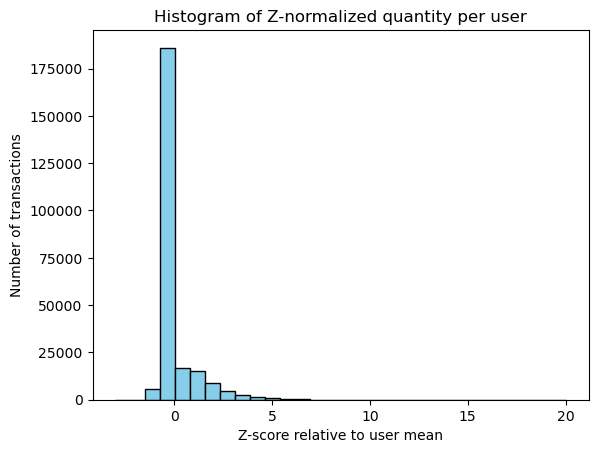

In [23]:
# Present histogram of qty_std_Z_byuser
# Add code here
plt.hist(churn['qty_std_Z_byuser'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Z-normalized quantity per user')
plt.xlabel('Z-score relative to user mean')
plt.ylabel('Number of transactions')
plt.show()

**What could be the purpose of this normalization?**
<br/>
Add comment here:  
The purpose is to make the data comparable across different users. The distribution shows all transanctions normalized per user where most values cluster around 0, because Z-scores center the data by user's mean, which is 0 in a Z normal distribution. 


7. Convert `item_id` into a category column in `churn_processed`.  Replace the `item_id` of all the items sold only once in the entire data with `"999999"`.  How many item ids are of category `"999999"`?  Display 10 rows of `churn_processed` where `item_id` is category `"999999"`.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[2 point]</span>

In [24]:
# Convert item_id into a category column in churn_processed
# Add code here
churn_processed['item_id'] = churn['item_id'].astype('category')

In [25]:
# Add code here

# Add Category
churn_processed['item_id'] = churn_processed['item_id'].cat.add_categories(["999999"])

#  Replace the item_id of all the items sold only once in the entire data with "999999"  
item_counts = churn_processed['item_id'].value_counts()
rare_items = item_counts[item_counts == 1].index #  Identify items sold only once
churn_processed.loc[churn_processed['item_id'].isin(rare_items), 'item_id'] = "999999" # replace rare items with "999999"

# How many item ids are of category "999999"
num_rare = (churn_processed['item_id'] == "999999").sum()
print(f'Number of item_ids replaced with "999999": {num_rare}')

# Display 10 rows of churn_processed where item_id is category 999999
print(churn_processed[churn_processed['item_id'] == "999999"].head(10))


Number of item_ids replaced with "999999": 876
      address_A  address_B  address_C  address_D  address_E  address_F  \
847         0.0        0.0        0.0        0.0        0.0        0.0   
1415        0.0        0.0        0.0        0.0        1.0        0.0   
1452        0.0        0.0        0.0        0.0        0.0        0.0   
1457        0.0        0.0        0.0        0.0        0.0        0.0   
1458        0.0        0.0        0.0        0.0        0.0        0.0   
2201        0.0        0.0        0.0        0.0        1.0        0.0   
2388        0.0        0.0        0.0        0.0        1.0        0.0   
2468        0.0        0.0        0.0        0.0        1.0        0.0   
3045        0.0        0.0        0.0        0.0        1.0        0.0   
3871        0.0        1.0        0.0        0.0        0.0        0.0   

      address_G  address_H  dow_0  dow_1  ...  dow_4  dow_5  dow_6  month_1  \
847         1.0        0.0    0.0    0.0  ...    0.0    0.0

# End of assignment